In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import xgboost as xgb

In [5]:
data_path = '/content/Global skincare and Beauty e-store_E-commerce Analysis_English.csv'
df = pd.read_csv(data_path)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row ID             51290 non-null  int64  
 1   Order ID           51290 non-null  object 
 2   Order Date         51290 non-null  object 
 3   Customer ID        51290 non-null  object 
 4   Segment            51290 non-null  object 
 5   City               51290 non-null  object 
 6   State              51290 non-null  object 
 7   Country            51290 non-null  object 
 8   Country latitude   51290 non-null  float64
 9   Country longitude  51290 non-null  float64
 10  Region             51290 non-null  object 
 11  Market             51290 non-null  object 
 12  Subcategory        51290 non-null  object 
 13  Category           51290 non-null  object 
 14  Product            51290 non-null  object 
 15  Quantity           51290 non-null  int64  
 16  Sales              512

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Row ID               0
Order ID             0
Order Date           0
Customer ID          0
Segment              0
City                 0
State                0
Country              0
Country latitude     0
Country longitude    0
Region               0
Market               0
Subcategory          0
Category             0
Product              0
Quantity             0
Sales                0
Discount             0
Profit               0
dtype: int64


In [8]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Customer ID, Segment, City, State, Country, Country latitude, Country longitude, Region, Market, Subcategory, Category, Product, Quantity, Sales, Discount, Profit]
Index: []


In [9]:
print("Column Names:", df.columns)

Column Names: Index(['Row ID', 'Order ID', 'Order Date', 'Customer ID', 'Segment', 'City',
       'State', 'Country', 'Country latitude', 'Country longitude', 'Region',
       'Market', 'Subcategory', 'Category', 'Product', 'Quantity', 'Sales',
       'Discount', 'Profit'],
      dtype='object')


In [10]:
print(df.describe())

            Row ID  Country latitude  Country longitude      Quantity  \
count  51290.00000      51290.000000       51290.000000  51290.000000   
mean   25645.50000         24.506298          -4.585665      5.415832   
std    14806.29199         24.119393          80.298692      4.908234   
min        1.00000        -40.900557        -106.346771      1.000000   
25%    12823.25000         12.879721         -95.712891      2.000000   
50%    25645.50000         35.861660           2.213749      4.000000   
75%    38467.75000         38.963745          43.679291      7.000000   
max    51290.00000         61.924110         174.885971     20.000000   

              Sales      Discount        Profit  
count  51290.000000  51290.000000  51290.000000  
mean     127.074946      0.142908     20.772346  
std      236.074764      0.212280     83.582680  
min        2.000000      0.000000  -1746.000000  
25%       25.000000      0.000000      0.000000  
50%       56.000000      0.000000      7.2

Dataset ini memiliki 51.290 baris dan 19 kolom, dengan tidak ada missing values di setiap kolom. Tipe data terdiri dari 3 kolom numerik (int64), 4 kolom desimal (float64), dan 12 kolom kategorikal (object). Kolom numerik mencakup Quantity, Sales, Discount, dan Profit, sementara kolom kategorikal mencakup Order ID, Customer ID, Segment, City, State, dan lainnya.Tidak ada missing values dalam dataset ini. Statistik deskriptif menunjukkan bahwa rata-rata jumlah barang yang dipesan adalah 5,41 dengan maksimum 20 unit per transaksi, serta harga penjualan berkisar antara 2 hingga 3.940. Diskon bervariasi dari 0% hingga 85%, sementara profit berkisar dari -1.746 (rugi) hingga 1.820 (untung).

In [11]:
df.drop(columns=['Row ID', 'Order ID', 'Order Date', 'Customer ID', 'City', 'State', 'Product'], errors='ignore', inplace=True)

label_cols = ['Segment']
label_encoder = LabelEncoder()

for col in label_cols:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

nominal_cols = [ 'Country', 'Category', 'Subcategory', 'Region', 'Market']
existing_nominal_cols = [col for col in nominal_cols if col in df.columns]

if existing_nominal_cols:
    df = pd.get_dummies(df, columns=existing_nominal_cols)

df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.median(numeric_only=True), inplace=True)

print(df.head())


   Segment  Country latitude  Country longitude  Quantity  Sales  Discount  \
0        1         33.223191          43.679291        20    600       0.0   
1        2        -14.235004         -51.925280         2     40       0.6   
2        2         21.521757         -77.781167         1    151       0.0   
3        2         21.521757         -77.781167         4     40       0.0   
4        0         35.861660         104.195397         1     11       0.0   

   Profit  Country_Afghanistan  Country_Albania  Country_Algeria  ...  \
0   300.0                False            False            False  ...   
1    -4.0                False            False            False  ...   
2    75.5                False            False            False  ...   
3    20.0                False            False            False  ...   
4     5.5                False            False            False  ...   

   Region_Southern US  Region_Western Africa  Region_Western Asia  \
0               False  

Langkah-langkah ini dilakukan untuk membersihkan dan mengonversi data menjadi format yang lebih siap untuk analisis dan pemodelan machine learning. Pertama, beberapa kolom yang tidak relevan dihapus agar dataset lebih ringkas. Selanjutnya, kolom kategorikal seperti Segment dikonversi ke bentuk numerik menggunakan Label Encoding, sementara kolom nominal lainnya seperti Country, Category, Subcategory, Region, dan Market dikonversi menjadi variabel dummy menggunakan One-Hot Encoding. Setelah itu, semua data dikonversi ke tipe numerik, dan nilai yang hilang (NaN) diisi dengan median dari setiap kolom. Output yang dihasilkan adalah dataset dengan hanya nilai numerik, yang terdiri dari fitur asli seperti Quantity, Sales, Discount, Profit, serta banyak kolom baru yang merepresentasikan kategori dalam bentuk biner (True/False). Hasil akhirnya adalah dataset dengan 8.550 kolom yang siap digunakan untuk analisis atau model machine learning.

In [12]:
numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]


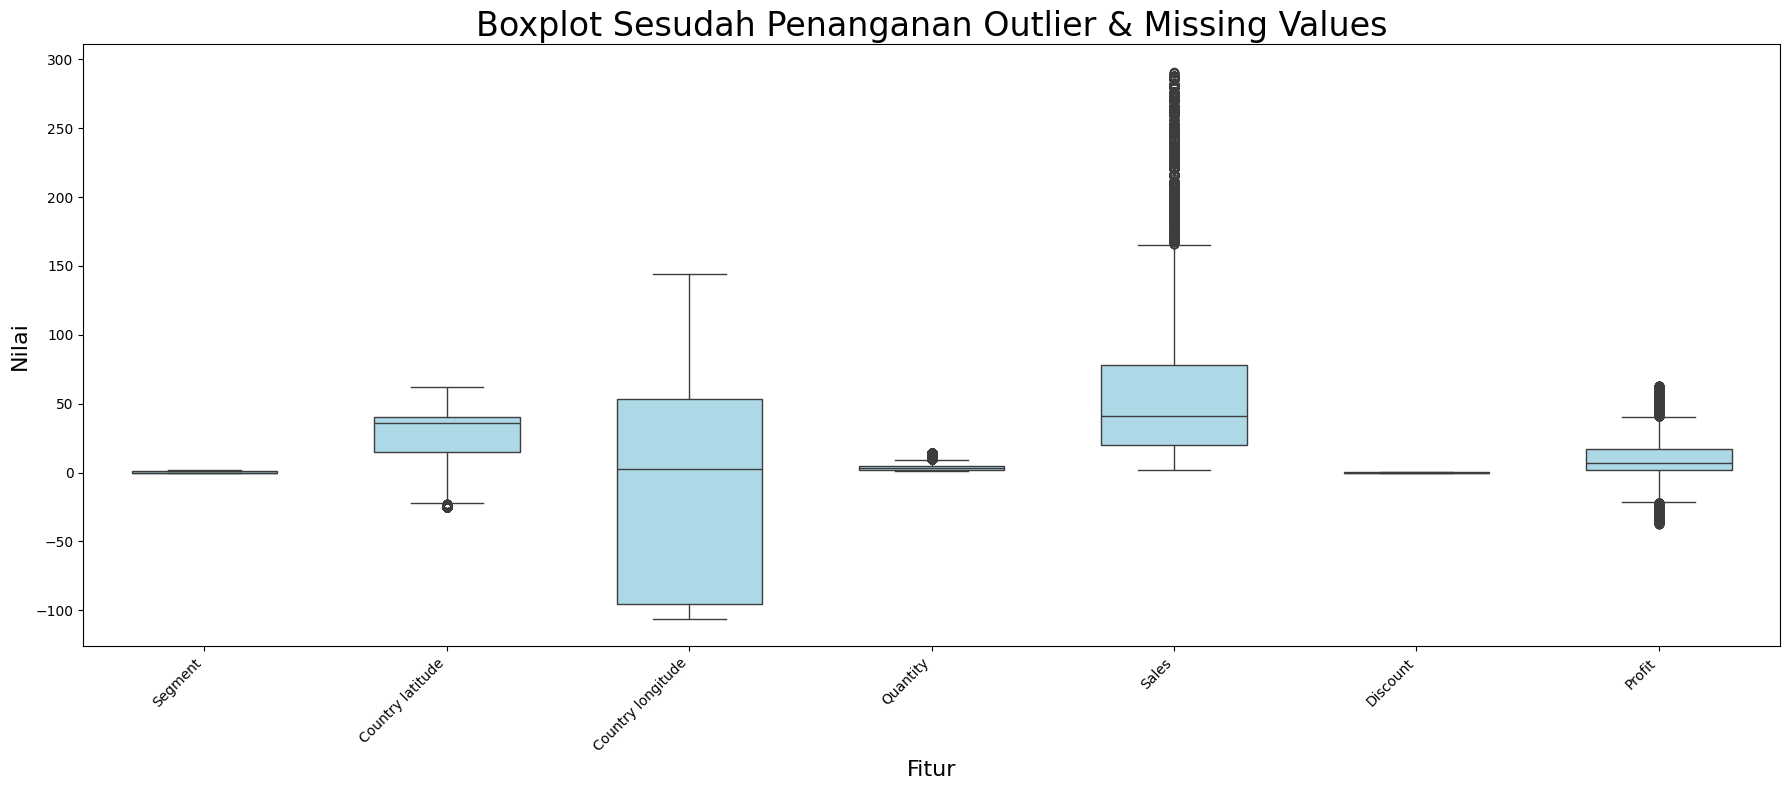

In [13]:
df_clean = df.fillna(df.median(numeric_only=True))
numeric_cols = df_clean.select_dtypes(include=['number'])

plt.figure(figsize=(18, 8))
sns.boxplot(data=numeric_cols, boxprops=dict(facecolor="lightblue"), width=0.6, showfliers=True)

plt.xticks(rotation=45, ha="right")
plt.title("Boxplot Sesudah Penanganan Outlier & Missing Values", fontsize=24)
plt.xlabel("Fitur", fontsize=16)
plt.ylabel("Nilai", fontsize=16)
plt.tight_layout()
plt.show()


boxplot membantu mengidentifikasi persebaran data dan keberadaan outlier dalam setiap fitur numerik. Missing values telah diatasi dengan menggantinya menggunakan median, yang membantu mempertahankan kestabilan distribusi data tanpa terpengaruh oleh nilai ekstrem. Sementara itu, outlier tetap terlihat pada beberapa fitur seperti Sales dan Profit, yang menunjukkan adanya nilai ekstrem dalam dataset. Proses ini penting untuk memastikan bahwa analisis atau model machine learning yang dibuat nantinya tidak terganggu oleh data yang tidak wajar atau tidak lengkap, sehingga meningkatkan kualitas hasil analisis dan prediksi.

<Figure size 1200x600 with 0 Axes>

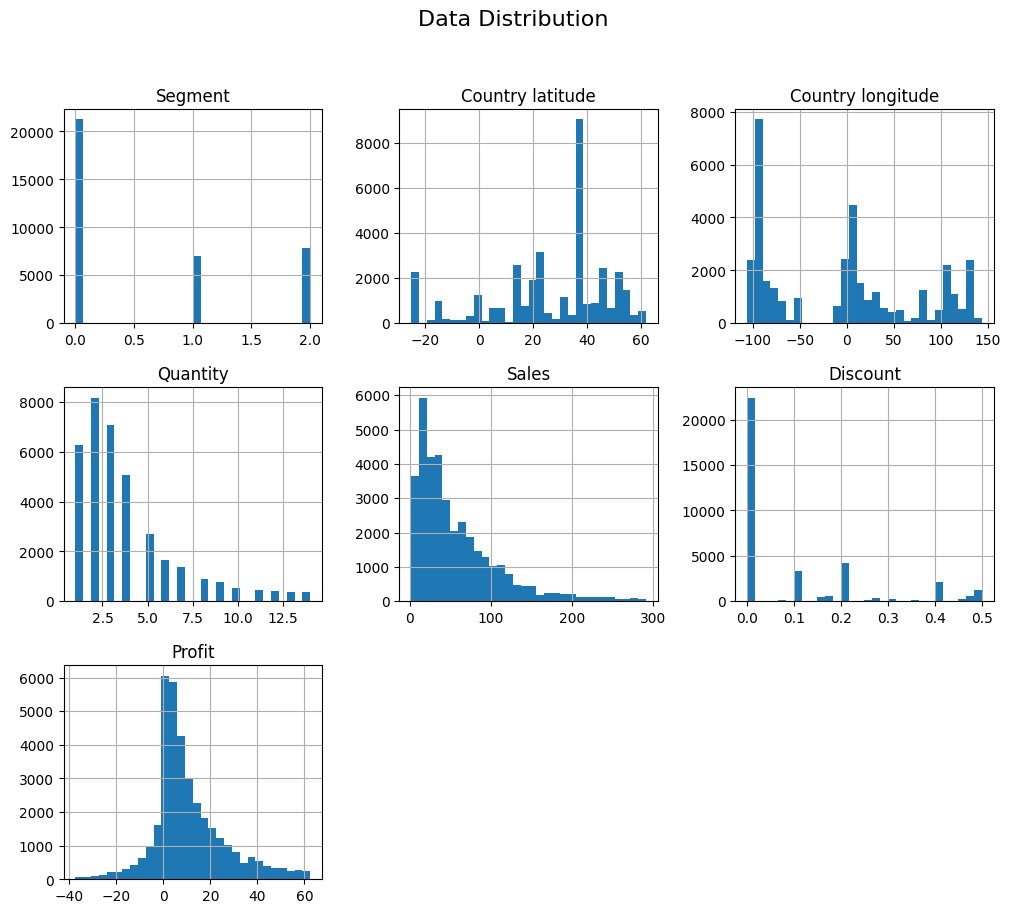

In [14]:
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Data Distribution', fontsize=16)
plt.show()

 Country latitude dan Country longitude memiliki variasi yang cukup luas, menunjukkan cakupan geografis yang beragam. Quantity dan Sales menunjukkan distribusi yang condong ke kanan, mengindikasikan mayoritas transaksi bernilai kecil dengan beberapa transaksi bernilai besar. Discount memiliki distribusi yang tidak merata, dengan sebagian besar nilai di sekitar nol. Sementara itu, Profit menunjukkan distribusi mendekati normal dengan sedikit skew ke kanan, yang berarti sebagian besar keuntungan berkisar di sekitar nol, dengan beberapa transaksi yang menghasilkan keuntungan tinggi maupun kerugian. Analisis distribusi ini membantu dalam mengidentifikasi pola data dan kebutuhan transformasi data sebelum digunakan untuk analisis atau pemodelan lebih lanjut.

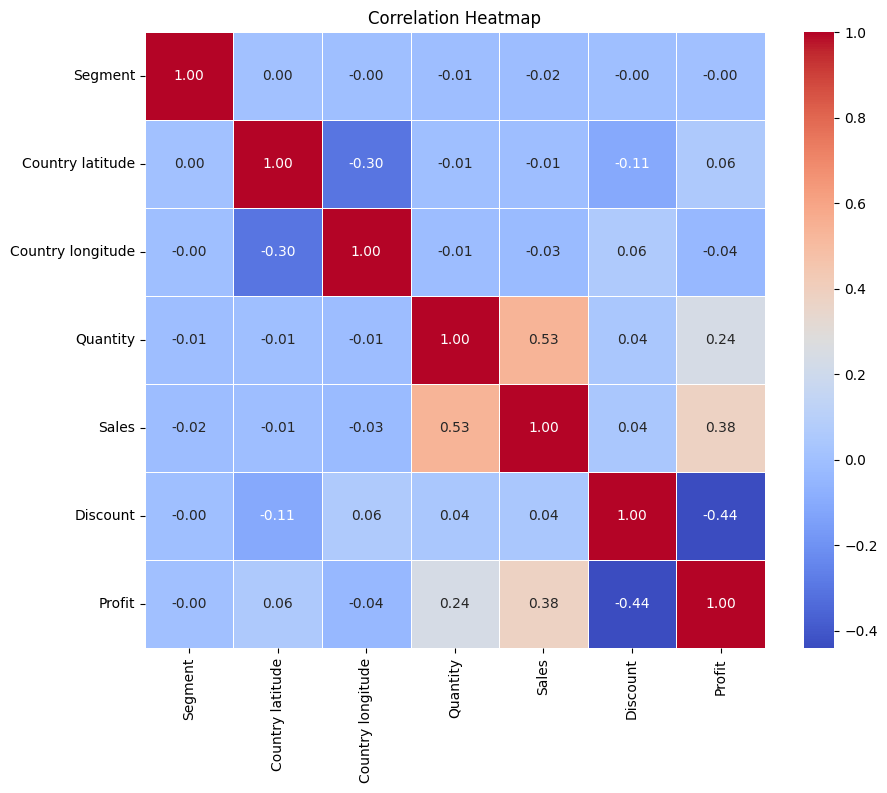

In [15]:
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Heatmap korelasi ini menunjukkan hubungan antar variabel dalam dataset. Dari visualisasi ini, terlihat bahwa Quantity memiliki korelasi positif yang cukup kuat dengan Sales (0.53), hal ini menandakan semakin banyak jumlah barang yang terjual, semakin tinggi total penjualan. Profit juga memiliki korelasi positif dengan Sales (0.38) dan Quantity (0.24), menandakan bahwa peningkatan penjualan cenderung meningkatkan keuntungan. Namun, Discount memiliki korelasi negatif dengan Profit (-0.44), yang menunjukkan bahwa semakin besar diskon yang diberikan, semakin kecil keuntungan yang diperoleh. Selain itu, korelasi antara variabel geografis seperti Country latitude dan Country longitude dengan variabel lainnya relatif kecil, menunjukkan bahwa lokasi tidak memiliki dampak signifikan terhadap variabel bisnis utama dalam dataset ini. Heatmap ini membantu dalam memahami bagaimana variabel saling berhubungan, yang berguna dalam pengambilan keputusan bisnis dan analisis lebih lanjut.

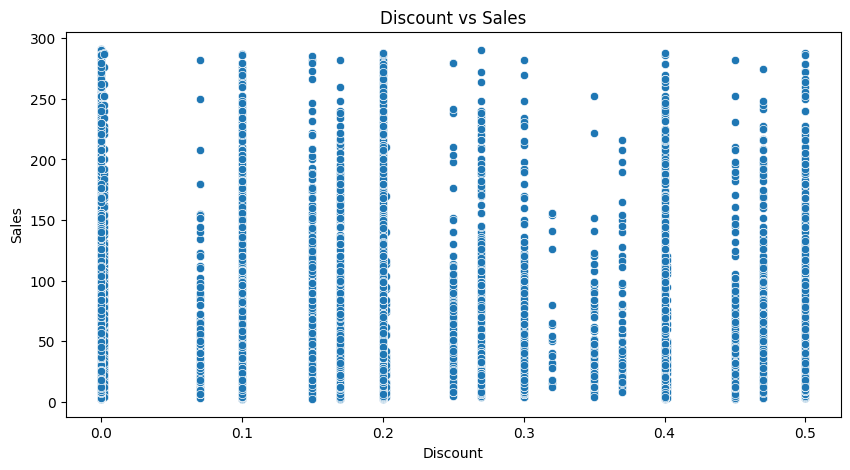

In [16]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Discount'], y=df['Sales'])
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

Scatter plot ini menunjukkan hubungan antara Discount dan Sales. Dari visualisasi ini, terlihat bahwa penjualan terjadi pada berbagai tingkat diskon, namun distribusi titik data tidak menunjukkan pola yang jelas. Artinya, peningkatan atau penurunan diskon tidak secara langsung menentukan jumlah penjualan yang lebih tinggi atau lebih rendah. Hal ini selaras dengan heatmap korelasi sebelumnya, yang menunjukkan korelasi rendah antara diskon dan penjualan. Meskipun diskon sering digunakan untuk meningkatkan penjualan, faktor lain seperti permintaan produk, strategi harga, dan loyalitas pelanggan mungkin lebih berpengaruh dalam menentukan total penjualan.

In [17]:
df.loc[:, 'Discount Impact'] = df['Discount'] * df['Sales']
df.loc[:, 'Profit Margin'] = df['Profit'] / (df['Sales'] + 1e-6)

print("Discount Impact:")
print(df[['Discount', 'Sales', 'Discount Impact']].head(), "\n")

print("Profit Margin:")
print(df[['Profit', 'Sales', 'Profit Margin']].head(), "\n")


Discount Impact:
    Discount  Sales  Discount Impact
3       0.00     40             0.00
4       0.00     11             0.00
7       0.00     52             0.00
14      0.50     63            31.50
15      0.47     48            22.56 

Profit Margin:
    Profit  Sales  Profit Margin
3    20.00     40           0.50
4     5.50     11           0.50
7    26.00     52           0.50
14    0.00     63           0.00
15    1.44     48           0.03 



Dua tabel di atas menunjukkan pengaruh diskon terhadap penjualan (Discount Impact) serta margin keuntungan (Profit Margin). Discount Impact dihitung dari perkalian Discount dan Sales, menunjukkan bahwa diskon tinggi dapat meningkatkan penjualan tetapi berpotensi menurunkan profitabilitas. Analisis ini penting bagi strategi bisnis untuk menyeimbangkan peningkatan penjualan dengan profitabilitas, membantu perusahaan menentukan titik optimal di mana diskon dapat mendorong penjualan tanpa mengorbankan terlalu banyak keuntungan.

In [18]:
X = df.drop(columns=['Sales'])
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train-Test Split:")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}\n")

Train-Test Split:
X_train shape: (28924, 222), X_test shape: (7232, 222)



code ini untuk pembagian data menjadi dua bagian: X_train (data latih) dan X_test (data uji).

- X_train shape: (28924, 222) : Berarti terdapat 28.924 sampel dengan 222 fitur yang digunakan untuk melatih model.
- X_test shape: (7232, 222) : Berarti terdapat 7.232 sampel dengan 222 fitur yang digunakan untuk menguji performa model.

In [19]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
print("Missing values replaced:")
print(X_train.head(), "\n")

Missing values replaced:
       Segment  Country latitude  Country longitude  Quantity  Discount  \
37560        0         32.427908          53.688046         1     0.000   
44355        0        -14.235004         -51.925280         3     0.000   
13011        2         46.227638           2.213749         4     0.000   
18357        2         18.735693         -70.162651         1     0.200   
39890        2          6.423750         -66.589730         1     0.402   

       Profit  Country_Afghanistan  Country_Albania  Country_Algeria  \
37560    1.20                False            False            False   
44355   52.50                False            False            False   
13011   32.00                False            False            False   
18357   13.80                False            False            False   
39890   -1.51                False            False            False   

       Country_Angola  ...  Region_Western Asia  Region_Western Europe  \
37560           F

memastikan bahwa dataset lengkap dan bebas dari nilai NaN, sehingga dapat digunakan secara optimal dalam model machine learning tanpa gangguan akibat nilai yang hilang atau tidak terdefinisi.

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Standardized Features:")
print(X_train[:5], "\n")

Standardized Features:
[[-0.76929454  0.26933375  0.74653204 ... -0.51735028 -0.45749049
  -0.47275669]
 [-0.76929454 -1.8610096  -0.56377523 ... -0.51735028 -0.45749049
   1.26964099]
 [ 1.68329023  0.89934507  0.1079086  ... -0.51735028 -0.45749049
   1.26964098]
 [ 1.68329023 -0.3557691  -0.79003986 ... -0.51735028  0.27570758
   0.39844215]
 [ 1.68329023 -0.91785716 -0.74571189 ... -0.51735028 -0.29730265
  -2.22386604]] 



standarisasi menggunakan StandardScaler, yang menyetarakan skala fitur dengan rata-rata 0 dan standar deviasi 1. Ini penting agar algoritma machine learning bekerja lebih efektif tanpa bias terhadap fitur dengan skala besar, mempercepat konvergensi, dan meningkatkan akurasi prediksi.

In [21]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

In [22]:
if X_train.shape[1] > 1:
    pca = PCA(n_components=0.95)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    print("PCA Applied:")
    print(X_train[:1], "\n")

PCA Applied:
[[ 2.07928010e+00 -8.53179066e-02 -1.01310433e+00 -9.34773757e-01
  -9.04648381e-02 -3.74914209e+00 -1.56770287e+00 -8.76236338e-01
  -1.62992326e+00 -5.92451996e-01  3.16236420e-02 -2.85611987e-01
   4.32448592e+00  5.04008138e-01 -1.22289869e-01 -3.16841518e-01
  -1.40256032e+00  2.52343055e-03  3.36962697e-02 -1.26079076e-01
  -1.75735544e-01 -7.76374481e-02 -1.99313588e-01 -4.67128585e-01
   5.07299653e-01 -2.42963867e+00  1.54062132e+00  2.39111744e-01
  -6.26452464e-01  3.49202775e-01 -1.00617132e+00  1.85980208e+00
   7.01864682e-01 -9.58571389e-01  1.05660108e+00  9.10848074e-01
  -1.94067416e+00 -1.26034836e-01  3.33691889e-01  8.60785288e-01
   5.72571938e-01  7.83656384e-01  4.47110536e-01 -8.69665420e-01
   2.78343184e+00 -3.03139978e+00  7.16771564e-01 -6.78586915e-01
   1.74827524e+00  1.91070059e-02 -5.53976952e-01 -2.76313125e-02
   2.38391770e-01  2.03061655e-01 -8.14050666e-01  2.71275130e-01
  -6.85695825e-02  1.35978570e+00 -2.11096960e-01 -1.60478247e+

code ini menerapkan Principal Component Analysis (PCA) untuk reduksi dimensi jika jumlah fitur pada X_train lebih dari 1. PCA mengurangi jumlah fitur sambil mempertahankan 95% variansi dalam data, sehingga model menjadi lebih efisien dan menghindari overfitting. Dengan menerapkan pca.fit_transform pada X_train dan pca.transform pada X_test, data dikonversi ke bentuk dengan dimensi lebih rendah, yang mempercepat proses pelatihan tanpa kehilangan informasi penting

In [23]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

Code ini berfungsi mengatasi nilai NaN setelah PCA

In [24]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=50)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

In [25]:
models = {
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
}

results = {}
mse = pd.DataFrame(columns=['Train MSE', 'Test MSE'], index=models.keys(), dtype=float)

code ini terdiri empat model yang akan digunakan untuk memprediksi Sales:

- K-Nearest Neighbors (KNN), memprediksi nilai berdasarkan 5 data terdekat.
- Random Forest, menggunakan 200 pohon keputusan untuk membuat prediksi.
- Gradient Boosting, model yang meningkatkan akurasi dengan menggabungkan banyak pohon keputusan.
- XGBoost, model serupa dengan Gradient Boosting, tetapi lebih cepat dan efisien.

Kode juga membuat dua tempat penyimpanan hasil:
- results untuk menyimpan prediksi model.
- mse untuk menyimpan nilai Mean Squared Error (MSE), yaitu angka yang menunjukkan seberapa besar kesalahan prediksi model.

In [26]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
results['K-Nearest Neighbors'] = {'MAE': mae_knn, 'R2 Score': r2_knn, 'RMSE': rmse_knn}
mse.iloc[0] = [mean_squared_error(y_train, knn.predict(X_train)), mean_squared_error(y_test, y_pred_knn)]
print(f"K-Nearest Neighbors - MAE: {mae_knn:.4f}")
print(f"K-Nearest Neighbors - R2 Score: {r2_knn:.4f}")
print(f"K-Nearest Neighbors - RMSE: {rmse_knn:.4f}\n")

K-Nearest Neighbors - MAE: 18.9791
K-Nearest Neighbors - R2 Score: 0.6237
K-Nearest Neighbors - RMSE: 31.0963



In [27]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
results['Random Forest'] = {'MAE': mae_rf, 'R2 Score': r2_rf, 'RMSE': rmse_rf}
mse.iloc[1] = [mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, y_pred_rf)]
print(f"Random Forest - MAE: {mae_rf:.4f}")
print(f"Random Forest - R2 Score: {r2_rf:.4f}")
print(f"Random Forest - RMSE: {rmse_rf:.4f}\n")

Random Forest - MAE: 18.9110
Random Forest - R2 Score: 0.7004
Random Forest - RMSE: 27.7484



In [28]:
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
results['Gradient Boosting'] = {'MAE': mae_gb, 'R2 Score': r2_gb, 'RMSE': rmse_gb}
mse.iloc[2] = [mean_squared_error(y_train, gb.predict(X_train)), mean_squared_error(y_test, y_pred_gb)]
print(f"Gradient Boosting - MAE: {mae_gb:.4f}")
print(f"Gradient Boosting - R2 Score: {r2_gb:.4f}")
print(f"Gradient Boosting - RMSE: {rmse_gb:.4f}\n")

Gradient Boosting - MAE: 13.5467
Gradient Boosting - R2 Score: 0.8268
Gradient Boosting - RMSE: 21.0972



In [29]:
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
results['XGBoost'] = {'MAE': mae_xgb, 'R2 Score': r2_xgb, 'RMSE': rmse_xgb}
mse.iloc[3] = [mean_squared_error(y_train, xgb_model.predict(X_train)), mean_squared_error(y_test, y_pred_xgb)]
print(f"XGBoost - MAE: {mae_xgb:.4f}")
print(f"XGBoost - R2 Score: {r2_xgb:.4f}")
print(f"XGBoost - RMSE: {rmse_xgb:.4f}\n")

XGBoost - MAE: 13.1463
XGBoost - R2 Score: 0.8313
XGBoost - RMSE: 20.8217



In [30]:
best_model_name = max(results, key=lambda x: results[x]['R2 Score'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Best Model: XGBoost


In [31]:
print(mse)

                      Train MSE    Test MSE
K-Nearest Neighbors  267.508937  966.981575
Random Forest        450.234524  769.972771
Gradient Boosting    254.687904  445.090595
XGBoost              255.798737  433.541473


Hasil evaluasi menunjukkan bahwa XGBoost adalah model terbaik dengan skor R2 = 0.8313, MAE = 13.1463, dan RMSE = 20.8217, mengungguli model lainnya. Gradient Boosting berada di posisi kedua dengan R2 = 0.8268, MAE = 13.5467, dan RMSE = 21.0972. Random Forest memiliki performa lebih rendah dengan R2 = 0.7004, sedangkan K-Nearest Neighbors (KNN) menunjukkan hasil terburuk dengan R2 = 0.6237, menunjukkan kesulitan dalam menangkap pola data. Dari tabel MSE, XGBoost dan Gradient Boosting juga memiliki Test MSE yang paling rendah (433.54 dan 445.09), menandakan generalisasi yang lebih baik dibanding model lain. Dengan demikian, XGBoost dipilih sebagai model terbaik berdasarkan kinerjanya dalam memprediksi data uji.

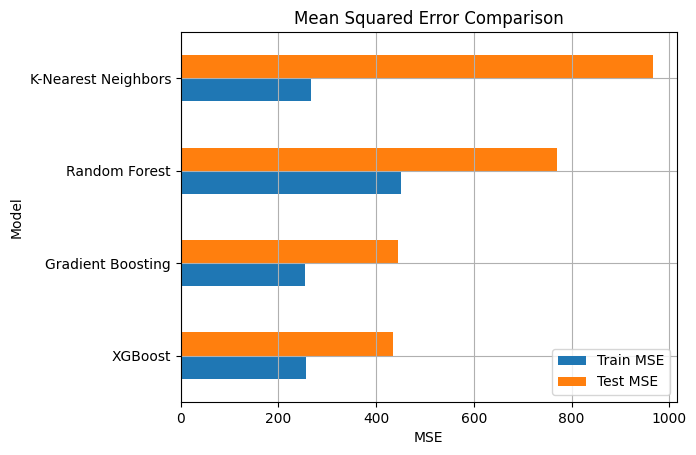

In [32]:

mse.sort_values(by='Test MSE', ascending=True).plot(kind='barh')
plt.title('Mean Squared Error Comparison')
plt.xlabel('MSE')
plt.ylabel('Model')
plt.grid(True)
plt.show()

Grafik ini membandingkan Mean Squared Error (MSE) dari empat model regresi: K-Nearest Neighbors (KNN), Random Forest, Gradient Boosting, dan XGBoost. Sumbu horizontal menunjukkan nilai MSE, sedangkan sumbu vertikal mewakili model yang diuji. Warna biru menunjukkan MSE pada data pelatihan (Train MSE), sedangkan warna orange menunjukkan MSE pada data uji (Test MSE). KNN memiliki Test MSE tertinggi, menunjukkan bahwa model ini kurang efektif dalam generalisasi.
Random Forest memiliki Test MSE yang lebih rendah dari KNN, tetapi masih lebih tinggi dibandingkan Gradient Boosting dan XGBoost.
Gradient Boosting dan XGBoost memiliki nilai Test MSE yang paling rendah, menunjukkan bahwa kedua model ini lebih baik dalam menangkap pola dalam data.
XGBoost memiliki Train MSE dan Test MSE yang paling kecil, mengindikasikan bahwa model ini memiliki keseimbangan terbaik antara akurasi dan generalisasi.
Secara keseluruhan, XGBoost adalah model terbaik berdasarkan MSE, karena memiliki kesalahan terkecil pada data uji.

In [35]:
pred_sample = X_test[:5]
pred_dict = {'y_true': y_test.iloc[:5].values}
for name, model in zip(models.keys(), [knn, rf, gb, xgb_model]):
    pred_dict[f'pred_{name}'] = model.predict(pred_sample).round(2)

pred_df = pd.DataFrame(pred_dict)
print("Sample Predictions:")
print(pred_df)

Sample Predictions:
   y_true  pred_K-Nearest Neighbors  pred_Random Forest  \
0     100                      78.0               50.87   
1      76                      56.5               40.63   
2      55                      36.0               56.14   
3      18                      48.0               35.36   
4     210                     119.0              143.72   

   pred_Gradient Boosting  pred_XGBoost  
0                   83.32     75.970001  
1                   32.81     37.970001  
2                   44.39     41.669998  
3                   18.34     22.030001  
4                  132.72    131.050003  


- XGBoost dan Gradient Boosting cenderung memberikan
prediksi yang lebih akurat dan lebih dekat ke nilai sebenarnya dibandingkan model lainnya.
- KNN dan Random Forest sering kali memberikan prediksi yang lebih jauh dari nilai sebenarnya, terutama pada nilai yang lebih tinggi.
- Secara keseluruhan, XGBoost tampaknya memiliki performa terbaik, karena menghasilkan prediksi yang lebih akurat dan stabil di berbagai sampel.